# LetsGrowMore

# Name: Satish Kumar

Project Name : Iris Flowers Classification ML Project

Task Level: Beginner

About Dataset: The data set consists of 50 samples from each of three species of Iris (Iris Setosa, Iris virginica, and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.
In this data we will be predicting the classes of the flowers based on these parameters.The data consists of continuous numeric values which describe the dimensions of the respective features. We will be training the model based on these features.



# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Import dataset

In [2]:
df=pd.read_csv(r"C:\Users\satis\Desktop\Letsgrowmore\IrisProject\iris.csv")

# Check number of rows and columns

In [3]:
df.shape

(150, 5)

# Check first 5 rows of dataset

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Check data types, column name and missing values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Check null values in dataset

In [6]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# To display number of samples on each class

In [7]:
df['species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: species, dtype: int64

# Check unique values in dataset

In [9]:
df.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

# Check statistical info of data

In [8]:
 df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Visualize the data

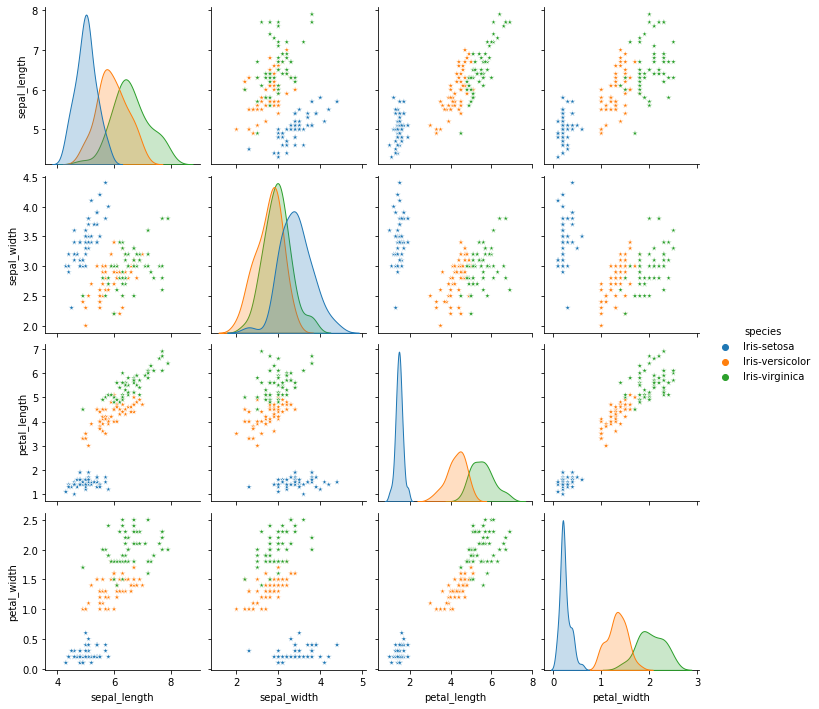

In [12]:
x = sns.pairplot(df, hue = 'species', markers = '*' )
plt.show()

# Create histrogram

<AxesSubplot:>

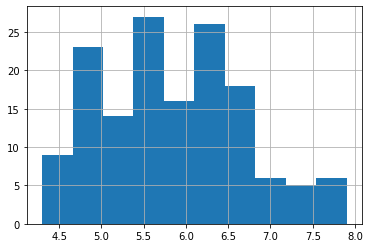

In [13]:
df['sepal_length'].hist()


<AxesSubplot:>

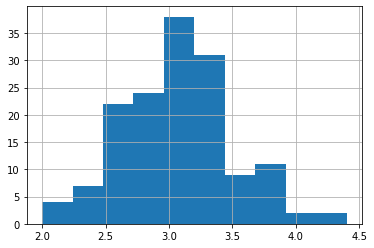

In [14]:
df['sepal_width'].hist()

<AxesSubplot:>

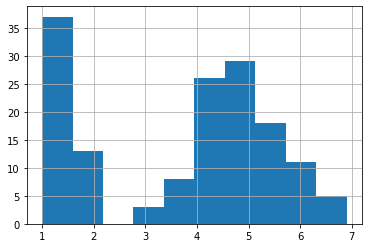

In [15]:
df['petal_length'].hist()

<AxesSubplot:>

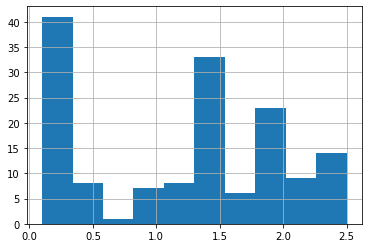

In [16]:
df['petal_width'].hist()

# Create scatterplot

In [17]:
colors = ['blue','orange','green']
species = ['Iris-versicolor','Iris-virginica','Iris-setosa']


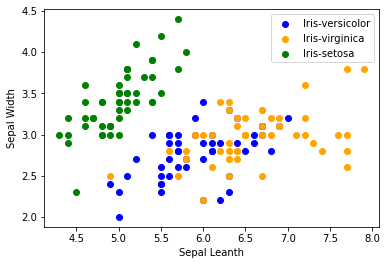

In [18]:
for i in range(3):
    x = df[df['species']==species[i]]
    plt.scatter(x['sepal_length'],x['sepal_width'], c = colors[i],label=species[i])
    plt.xlabel('Sepal Leanth')
    plt.ylabel('Sepal Width')
    plt.legend()

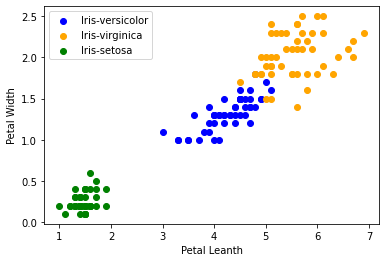

In [19]:
for i in range(3):
    x = df[df['species']==species[i]]
    plt.scatter(x['petal_length'],x['petal_width'], c = colors[i],label=species[i])
    plt.xlabel('Petal Leanth')
    plt.ylabel('Petal Width')
    plt.legend()

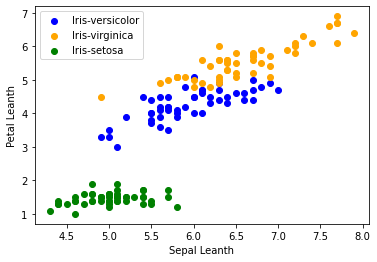

In [20]:
for i in range(3):
    x = df[df['species']==species[i]]
    plt.scatter(x['sepal_length'],x['petal_length'], c = colors[i],label=species[i])
    plt.xlabel('Sepal Leanth')
    plt.ylabel('Petal Leanth')
    plt.legend()

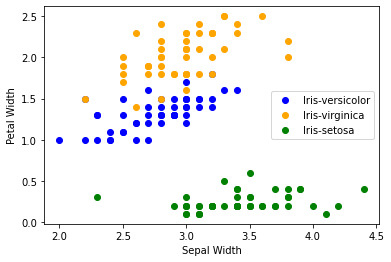

In [21]:
for i in range(3):
    x = df[df['species']==species[i]]
    plt.scatter(x['sepal_width'],x['petal_width'], c = colors[i],label=species[i])
    plt.xlabel('Sepal Width')
    plt.ylabel('Petal Width')
    plt.legend()

# Correlation

In [22]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

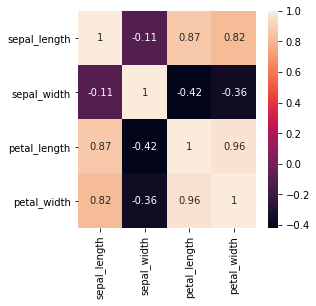

In [23]:
corr= df.corr()
fig, ax =plt.subplots(figsize = (4,4))
sns.heatmap(corr,annot= True,ax=ax)


# Label Encoder
 Machines understand data only in numeric form so we need to convert all categorical data to numerical datd

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [25]:
df['species']=le.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Creating the Model

In [26]:
# Train - 80
# Test - 20

from sklearn.model_selection import train_test_split
x = df.drop(columns=['species'])
y = df['species']
x_train, x_test, y_train,y_test = train_test_split(x,y, test_size=0.20)


# Logistic regression

In [27]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [28]:
model.fit(x_train,y_train)

C:\Users\satis\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
print('Accuracy score is: ',model.score(x_test,y_test)*100)

Accuracy score is:  96.66666666666667


# KNN K-Nearest Neighbor

In [30]:
 from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()


In [31]:
model.fit(x_train,y_train)

KNeighborsClassifier()

In [32]:
print('Accuracy Score is : ',model.score(x_test,y_test)*100)


print("*"*100)


Accuracy Score is :  96.66666666666667
****************************************************************************************************


# Thank You!!